In [1]:
#bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#carregando o csv 
db = pd.read_csv('Startups+in+2021+end.csv')

In [3]:
#visualizando a estrutura dos dados
db.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
db.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [5]:
#renomeando as colunas
db.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Company',
    'Valuation ($B)' : 'Valuation',
    'Date Joined' : 'Date',
    'Country' : 'Country',
    'City' : 'City',
    'Industry' : 'Industry',
    'Select Investors' : 'Investors',
}, inplace=True)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         936 non-null    int64 
 1   Company    936 non-null    object
 2   Valuation  936 non-null    object
 3   Date       936 non-null    object
 4   Country    936 non-null    object
 5   City       921 non-null    object
 6   Industry   936 non-null    object
 7   Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


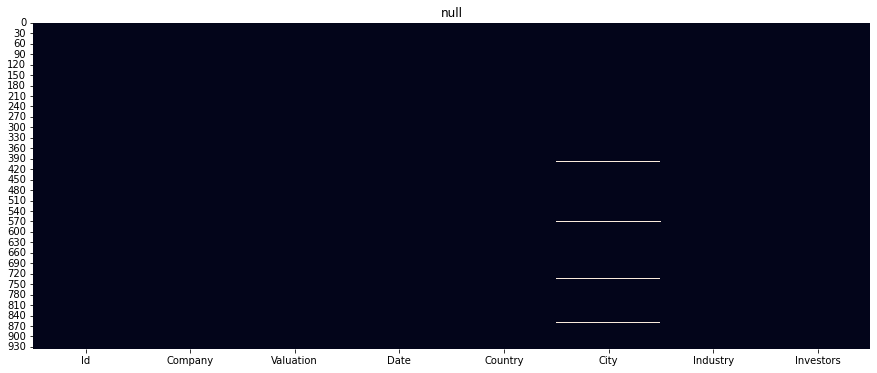

In [12]:
#analise grafica dos campos nulos
plt.figure(figsize=(15,6))
plt.title('null')
sns.heatmap(db.isnull(), cbar=False);

In [8]:
db.nunique()

Id           936
Company      935
Valuation    192
Date         589
Country       47
City         239
Industry      17
Investors    920
dtype: int64

In [9]:
#analise dos principais setores
db['Industry'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

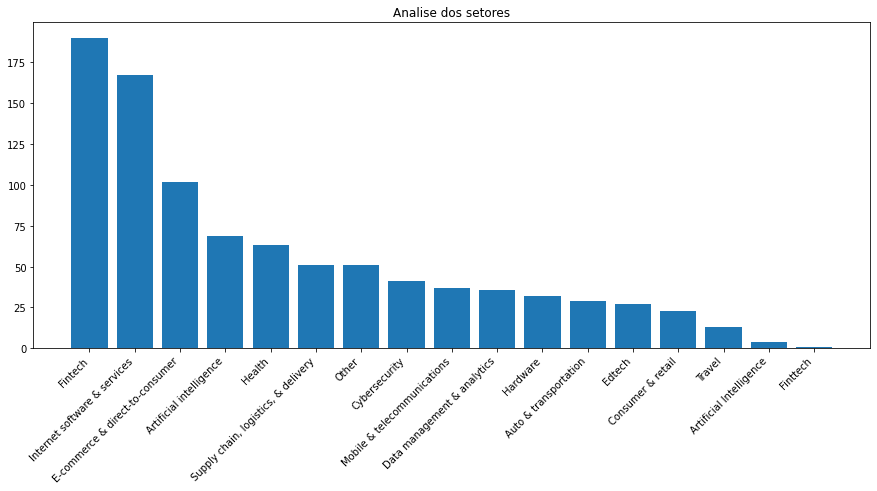

In [11]:
#analise grafica dos principais setores
plt.figure(figsize=(15,6))
plt.title('Analise dos setores')
plt.bar(db['Industry'].value_counts().index, db['Industry'].value_counts())
plt.xticks(rotation=45,ha='right');

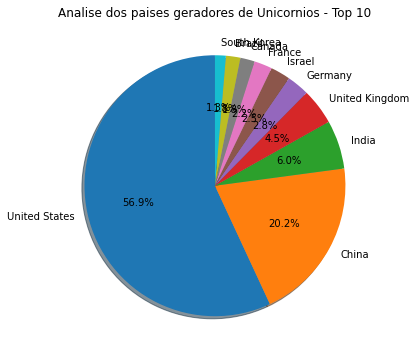

In [13]:
#analisando os países
countries = round(db['Country'].value_counts(normalize=True) * 100,1)
plt.figure(figsize=(15,6))
plt.title('Analise dos paises geradores de Unicornios - Top 10')
plt.pie(
    countries.head(10),
    labels= countries.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [14]:
#alterando o campo data de object para datetime
db['Date'] = pd.to_datetime(db['Date'])
db['Date'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date, dtype: datetime64[ns]

In [15]:
#extraindo o mes e o ano para futuras analises
db['month'] = pd.DatetimeIndex(db['Date']).month
db['year'] = pd.DatetimeIndex(db['Date']).year
db.head()

,Id,Company,Valuation,Date,Country,City,Industry,Investors,month,year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [16]:
#agrupando e gerando a tabela analitica das empresas unicornios brasileiras
gb = db.groupby(by=['Country','year','month','Company']).count()['Id'].reset_index()
gb.loc[
    gb['Country'] == 'Brazil'
]

,Country,year,month,Company,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [17]:
#alterando o campo valuation para numerico
db['Valuation'] = pd.to_numeric(db['Valuation'].apply(lambda Linha: Linha.replace('$', '')))
db.head()

,Id,Company,Valuation,Date,Country,City,Industry,Investors,month,year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


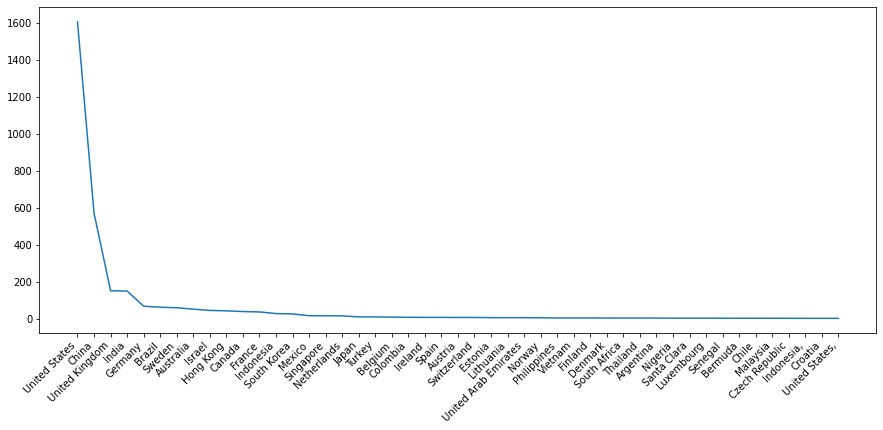

In [18]:
#descobrindo o valuation de cada pais - do maior ao menor
countries = db.groupby(by=['Country']).sum()['Valuation'].reset_index()
countries_valuation = countries.sort_values('Valuation', ascending=False)
plt.figure(figsize=(15,6))
plt.plot(
    countries_valuation['Country'],
    countries_valuation['Valuation']
)
plt.xticks(rotation=45, ha='right');